# Milestone Three

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from textblob import TextBlob
import string


## Load Data and Summarize

### Dataset 1: Web Page Phishing Dectection

In [2]:
# Load data
phishing_webpage_raw = pd.read_csv('dataset_phishing.csv')

In [3]:
# Sample of data
phishing_webpage_raw.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [4]:
# Summary of data types
phishing_webpage_raw.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [5]:
# Overall summary of data row counts, means, standard deviation, min, max, and distibution
phishing_webpage_raw.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

### Dataset 2: Phishing Email Detection

In [6]:
# Load data
phishing_email_raw = pd.read_csv('Phishing_Email.csv', index_col=0)

In [7]:
# Sample of data
phishing_email_raw.head()

Email Text      Email Type
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email
1  the other side of * galicismos * * galicismo *...      Safe Email
2  re : equistar deal tickets are you still avail...      Safe Email
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email
4  software at incredibly low prices ( 86 % lower...  Phishing Email

In [8]:
# Summary of data types
phishing_email_raw.dtypes

Email Text    object
Email Type    object
dtype: object

In [9]:
# Overall summary of data row counts, unique values, top occuring elements and frequency
phishing_email_raw.describe()

Email Text  Email Type
count       18634       18650
unique      17537           2
top         empty  Safe Email
freq          533       11322

There looks to be missing values in this dataset because the count of the email text and email type are different. The frequency of safe emails is greater than the frequncy of phishing emails. There are 533 empty emails in the dataset.

### Dataset 3: Cybersecurity Risk 2022

In [10]:
# Load data
cyber_security_raw = pd.read_csv('Cybersecurity_Risk/2022-06-08-enriched.csv')

In [11]:
# Sample of data
cyber_security_raw.head()

cve_id vendor_project             product  \
0  CVE-2021-27104      accellion                 FTA   
1  CVE-2021-27102      accellion                 FTA   
2  CVE-2021-27101      accellion                 FTA   
3  CVE-2021-27103      accellion                 FTA   
4  CVE-2021-21017          adobe  Acrobat and Reader   

                                  vulnerability_name  date_added  \
0   Accellion FTA OS Command Injection Vulnerability  2021-11-03   
1   Accellion FTA OS Command Injection Vulnerability  2021-11-03   
2          Accellion FTA SQL Injection Vulnerability  2021-11-03   
3                   Accellion FTA SSRF Vulnerability  2021-11-03   
4  Adobe Acrobat and Reader Heap-based Buffer Ove...  2021-11-03   

                                   short_description  \
0  Accellion FTA 9_12_370 and earlier is affected...   
1  Accellion FTA 9_12_411 and earlier is affected...   
2  Accellion FTA 9_12_370 and earlier is affected...   
3  Accellion FTA 9_12_411 and earlier is affected...   
4  Acrobat Reader DC versions versions 2020.013.2...   

                          required_action    due_date  notes  grp    pub_date  \
0  Apply updates per vendor instructions.  2021-11-17    NaN    1  2021-02-16   
1  Apply updates per vendor instructions.  2021-11-17    NaN    1  2021-02-16   
2  Apply updates per vendor instructions.  2021-11-17    NaN    1  2021-02-16   
3  Apply updates per vendor instructions.  2021-11-17    NaN    1  2021-02-16   
4  Apply updates per vendor instructions.  2021-11-17    NaN    1  2021-02-11   

   cvss      cwe   vector complexity  severity  
0   9.8   CWE-78  NETWORK        LOW  CRITICAL  
1   7.8   CWE-78    LOCAL        LOW      HIGH  
2   9.8   CWE-89  NETWORK        LOW  CRITICAL  
3   9.8  CWE-918  NETWORK        LOW  CRITICAL  
4   8.8  CWE-787  NETWORK        LOW      HIGH

In [12]:
# Summary of data types
cyber_security_raw.dtypes

cve_id                 object
vendor_project         object
product                object
vulnerability_name     object
date_added             object
short_description      object
required_action        object
due_date               object
notes                 float64
grp                     int64
pub_date               object
cvss                  float64
cwe                    object
vector                 object
complexity             object
severity               object
dtype: object

The python method pd.df.describe() will not be used with this dataset in the raw format because there are too many object type columns.

In [13]:
vendors = len(cyber_security_raw['vendor_project'].unique())
print(f'There are {vendors} unique vendor names.')

There are 132 unique vendor names.


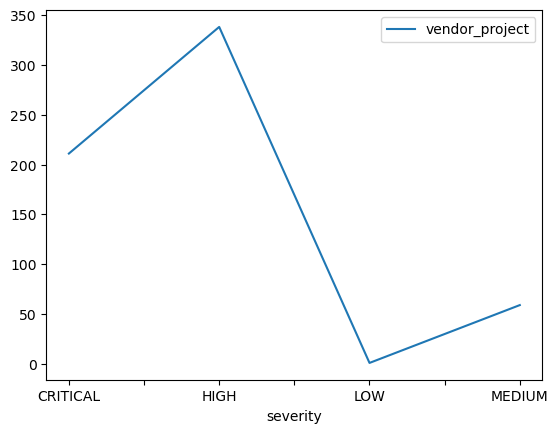

In [14]:
cyber_security_raw[['vendor_project', 'severity']].groupby('severity').count().plot()
None

### Dataset 4: Credit Card Transactions Fraud Detection Dataset

In [15]:
credit_card_raw1 = pd.read_csv('fraudTest.csv', index_col=0)
credit_card_raw2 = pd.read_csv('fraudTrain.csv', index_col=0)

In [16]:
credit_card_raw = pd.concat([credit_card_raw1, credit_card_raw2], axis=0)

In [17]:
credit_card_raw.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [18]:
credit_card_raw.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [19]:
credit_card_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5)

## Preprocessing

### Dataset 1: Web Page Phishing Detection

In [20]:
# Check for null values
web_nulls = phishing_webpage_raw.isnull().sum().sum()

if web_nulls == 0:
    print('No missing values found.')
else:
    print(f'There are {web_nulls} missing data fields in the dataset.')

No missing values found.


In [21]:
# Check for duplicates
web_duplicates = phishing_webpage_raw.duplicated().sum()

if web_duplicates == 0:
    print('No duplicates found.')
else:
    print(f'There are {web_duplicates} duplicates in the dataset.')

No duplicates found.


In [22]:
count_neg_ones = (phishing_webpage_raw == -1).sum().sum()
print(f'There are {count_neg_ones} values equal to -1.')

There are 1827 values equal to -1.


In [23]:
# Replace -1 values with 0
phishing_webpage_raw.replace(-1, 0, inplace=True)

In [24]:
# Check to see if replace worked
if (phishing_webpage_raw == -1).sum().sum() == 0:
    print('Success!')
else:
    print('Try again. There are still -1 values.')

Success!


In [25]:
# Calculate mean, median, and mode for numeric values
web_means = phishing_webpage_raw.mean(numeric_only=True)

web_medians = phishing_webpage_raw.median(numeric_only=True)

web_modes = phishing_webpage_raw.mode(numeric_only=True).iloc[0]


In [26]:
print('Means for the Data by Column')
print(web_means)

Means for the Data by Column
length_url             61.126684
length_hostname        21.090289
ip                      0.150569
nb_dots                 2.480752
nb_hyphens              0.997550
                       ...      
domain_age           4062.699563
web_traffic        856756.643307
dns_record              0.020122
google_index            0.533946
page_rank               3.185739
Length: 87, dtype: float64


In [27]:
print('Medians for the Data by Column')
print(web_medians)

Medians for the Data by Column
length_url           47.0
length_hostname      19.0
ip                    0.0
nb_dots               2.0
nb_hyphens            0.0
                    ...  
domain_age         3993.0
web_traffic        1651.0
dns_record            0.0
google_index          1.0
page_rank             3.0
Length: 87, dtype: float64


In [28]:
print('Modes for the Data by Column')
print(web_modes)

Modes for the Data by Column
length_url         26.0
length_hostname    16.0
ip                  0.0
nb_dots             2.0
nb_hyphens          0.0
                   ... 
domain_age          0.0
web_traffic         0.0
dns_record          0.0
google_index        1.0
page_rank           0.0
Name: 0, Length: 87, dtype: float64


In [29]:
# Encode status column
one_hot = pd.get_dummies(phishing_webpage_raw["status"])
phishing_webpage = phishing_webpage_raw.join(one_hot).copy()

# Convert to integers
phishing_webpage[['legitimate','phishing']] = phishing_webpage[['legitimate','phishing']].astype(int)

# Check to see if encoding worked
phishing_webpage.iloc[0:5]

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45           0   
1                        0                          77        5767   
2                        0                          14        4004   
3                        0                          62           0   
4                        0                         224        8175   

   web_traffic  dns_record  google_index  page_rank      status  legitimate  \
0            0           1             1          4  legitimate           1   
1            0           0             1          2    phishing           0   
2      5828815           0             1          0    phishing           0   
3       107721           0             0          3  legitimate           1   
4         8725           0             0          6  legitimate           1   

   phishing  
0         0  
1         1  
2         1  
3         0  
4         0  

[5 rows x 91 columns]

In [30]:
# Manually select interesting features to simplify preliminary analysis
url_features = ['url', 
                'length_url', 
                'length_hostname',
                'ip',
                'nb_dots',
                'nb_hyphens',
                'nb_at',
                'nb_qm',
                'nb_and',
                'nb_or',
                'nb_eq',
                'nb_underscore',
                'nb_tilde',
                'nb_percent',
                'nb_slash',
                'nb_star',
                'nb_colon',
                'nb_comma',
                'nb_semicolumn',
                'nb_dollar',
                'https_token',
                'ratio_digits_url',
                'ratio_digits_host',
                'nb_redirection',
                'char_repeat',
                'legitimate',
                'phishing']
phishing_webpage_filtered = phishing_webpage[url_features]

In [31]:
phishing_webpage_filtered.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...      nb_comma  nb_semicolumn     nb_dollar  \
count  11430.000000  ...  11430.000000   11430.000000  11430.000000   
mean       0.293176  ...      0.004024       0.062292      0.001925   
std        0.998317  ...      0.103240       0.598190      0.077111   
min        0.000000  ...      0.000000       0.000000      0.000000   
25%        0.000000  ...      0.000000       0.000000      0.000000   
50%        0.000000  ...      0.000000       0.000000      0.000000   
75%        0.000000  ...      0.000000       0.000000      0.000000   
max       19.000000  ...      4.000000      20.000000      6.000000   

        https_token  ratio_digits_url  ratio_digits_host  nb_redirection  \
count  11430.000000      11430.000000       11430.000000    11430.000000   
mean       0.610936          0.053137           0.025024        0.498250   
std        0.487559          0.089363           0.093422        0.691907   
min        0.000000          0.000000           0.000000        0.000000   
25%        0.000000          0.000000           0.000000        0.000000   
50%        1.000000          0.000000           0.000000        0.000000   
75%        1.000000          0.079365           0.000000        1.000000   
max        1.000000          0.723881           0.800000        6.000000   

        char_repeat    legitimate      phishing  
count  11430.000000  11430.000000  11430.000000  
mean       2.927472      0.500000      0.500000  
std        4.768936      0.500022      0.500022  
min        0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000  
50%        3.000000      0.500000      0.500000  
75%        4.000000      1.000000      1.000000  
max      146.000000      1.000000      1.000000  

[8 rows x 26 columns]

### Dataset 2: Phishing Email Detection

In [32]:
# Convert Email Text column to string type
phishing_email_raw['Email Text'] = phishing_email_raw['Email Text'].astype('string')

if phishing_email_raw['Email Text'].dtype == 'string':
    print('Sucess!')
else:
    print('Failure.')

Sucess!


In [33]:
# One-hot encode Email Type column for modeling prep
one_hot = pd.get_dummies(phishing_email_raw['Email Type'])
phishing_email_encoded = phishing_email_raw.join(one_hot).copy()

# Convert to binary integers
phishing_email_encoded[['Phishing Email', 'Safe Email']] = phishing_email_encoded[['Phishing Email', 'Safe Email']].astype(int)

# Drop Original Email Type Column
phishing_email_encoded = phishing_email_encoded.drop(columns='Email Type')

# Show Results
phishing_email_encoded.iloc[0:5]

Email Text  Phishing Email  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...               0   
1  the other side of * galicismos * * galicismo *...               0   
2  re : equistar deal tickets are you still avail...               0   
3  
Hello I am your hot lil horny toy.
    I am t...               1   
4  software at incredibly low prices ( 86 % lower...               1   

   Safe Email  
0           1  
1           1  
2           1  
3           0  
4           0

In [34]:
# Check for missing values
phishing_email_encoded.isnull().sum()

Email Text        16
Phishing Email     0
Safe Email         0
dtype: int64

In [35]:
# Remove missing values
phishing_email_cleaned = phishing_email_encoded.dropna()

# Check to see if cleaning was a success
if phishing_email_cleaned.isnull().sum().sum() == 0:
    print('Null values successfully removed.')
else:
    print('Unsuccessul. Null values remain.')

Null values successfully removed.


In [36]:
# Check for duplicated values
phishing_email_cleaned['Email Text'].is_unique

False

Since the "empty" emails will be flagged as duplicates. I will remove them, then remove the duplicates, and then add the empty emails back in.

In [37]:
# Save empty emails to a separate dataframe
empty_emails = phishing_email_cleaned.query("`Email Text` == 'empty'")

In [38]:
# Check for duplicates that are not empty
check_duplicates = phishing_email_cleaned[phishing_email_cleaned.duplicated(keep='first')].query("`Email Text` != 'empty'")
print(f'There are a total of {len(check_duplicates)} duplicates that were found.')

There are a total of 565 duplicates that were found.


In [39]:
# Filter out the empty emails and drop duplicates
no_duplicated_emails = phishing_email_cleaned.query("`Email Text` != 'empty'").drop_duplicates()

# Check how many duplicates remain
if no_duplicated_emails.duplicated().sum() == 0:
    print('Sucess!')
else:
    print('Failure.')

Sucess!


In [40]:
# Add the empty email back to the dataset
phishing_email_cleaned = pd.concat([no_duplicated_emails, empty_emails], axis=0)

In [41]:
# Make sure everything worked
if phishing_email_cleaned.duplicated(keep=False).sum() == len(empty_emails):
    print('Only empty duplicates remain. Success!')
else:
    print('Review duplicated rows. Failure.')

Only empty duplicates remain. Success!


In [42]:
# Use TextBlob to perform a simple sentiment analysis on the emails.
phishing_email_cleaned['Polarity'] = None
phishing_email_cleaned['Subjectivity'] = None

for i, email in phishing_email_cleaned['Email Text'].items():
    blob = TextBlob(email)
    sentiment = blob.sentiment

    # Add to dataframe
    phishing_email_cleaned.at[i, 'Polarity'] = sentiment.polarity
    phishing_email_cleaned.at[i, 'Subjectivity'] = sentiment.subjectivity

In [43]:
phishing_email_cleaned.head()

Email Text  Phishing Email  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...               0   
1  the other side of * galicismos * * galicismo *...               0   
2  re : equistar deal tickets are you still avail...               0   
3  
Hello I am your hot lil horny toy.
    I am t...               1   
4  software at incredibly low prices ( 86 % lower...               1   

   Safe Email  Polarity Subjectivity  
0           1  0.201493     0.514213  
1           1  0.009375     0.084375  
2           1   0.09154     0.515783  
3           0  0.260069     0.690278  
4           0  0.152579     0.505258

In [44]:
def count_unique_words(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Split the text into words
    words = text.split()
    
    # Remove duplicates and count the unique words
    unique_words = set(words)
    
    return len(unique_words)


In [45]:
phishing_email_cleaned['Unique_Words'] = None

for i, email in phishing_email_cleaned['Email Text'].items():
    # Count unique words
    unique_word_count = count_unique_words(email)

    # Add to DataFrame
    phishing_email_cleaned.at[i, 'Unique_Words'] = unique_word_count

In [46]:
phishing_email_cleaned.head()

Email Text  Phishing Email  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...               0   
1  the other side of * galicismos * * galicismo *...               0   
2  re : equistar deal tickets are you still avail...               0   
3  
Hello I am your hot lil horny toy.
    I am t...               1   
4  software at incredibly low prices ( 86 % lower...               1   

   Safe Email  Polarity Subjectivity Unique_Words  
0           1  0.201493     0.514213          110  
1           1  0.009375     0.084375           53  
2           1   0.09154     0.515783          102  
3           0  0.260069     0.690278           73  
4           0  0.152579     0.505258           60

### Dataset 3: Credit Card Transactions Fraud Detection Dataset

In [47]:
# Check for missing values
credit_card_raw.isnull().sum().sum()

0

In [48]:
# Check for duplicates
check_duplicates_ccd = credit_card_raw[credit_card_raw.duplicated(keep='first')]
print(f'There are a total of {len(check_duplicates_ccd)} duplicates that were found.')

There are a total of 0 duplicates that were found.


In [49]:
# Change to date-time format
credit_card_raw['trans_date_trans_time'] = pd.to_datetime(credit_card_raw['trans_date_trans_time'], format="%Y-%m-%d %H:%M:%S")

In [50]:
# Add age feature
credit_card_raw['dob'] = pd.to_datetime(credit_card_raw['dob'], format="%Y-%m-%d")

In [51]:
credit_card_raw['age'] = (pd.to_datetime("today") - credit_card_raw['dob']).dt.days // 365

In [52]:
credit_card_raw.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      long  \
0   Elliott      M            351 Darlene Green    Columbia  ...  -80.9355   
1  Williams      F             3638 Marsh Union     Altonah  ... -110.4360   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  -85.0170   

   city_pop                     job        dob  \
0    333497     Mechanical engineer 1968-03-19   
1       302  Sales professional, IT 1990-01-17   
2     34496       Librarian, public 1970-10-21   
3     54767            Set designer 1987-07-25   
4      1126      Furniture designer 1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  age  
0         0   57  
1         0   35  
2         0   54  
3         0   37  
4         0   69  

[5 rows x 23 columns]

## Univariant Analysis

### Dataset 1: Web Page Phishing Detection

In [53]:
phishing_webpage_features = phishing_webpage_filtered.drop(columns=['url', 'phishing', 'legitimate'], inplace=False)

In [54]:
phishing_webpage_target = phishing_webpage_filtered[['phishing', 'legitimate']]

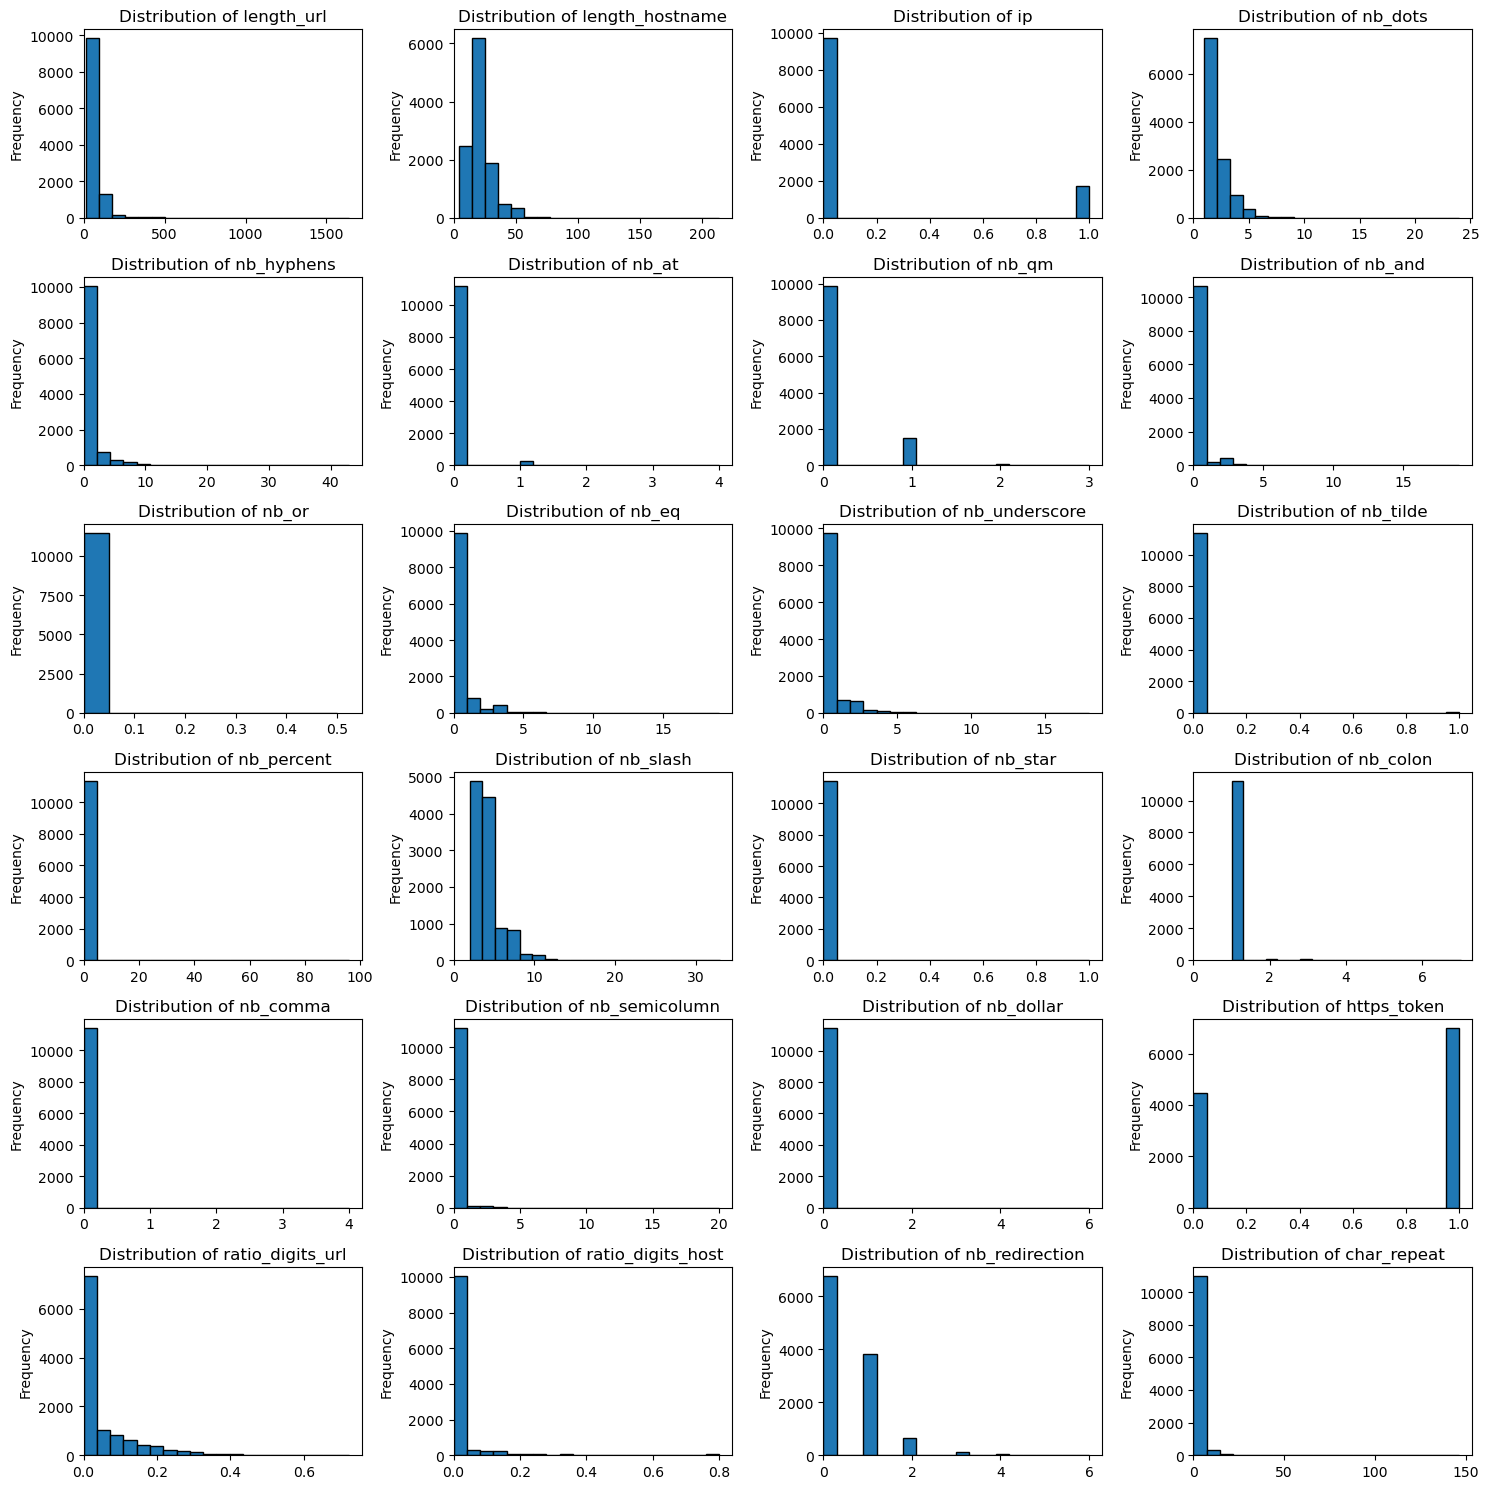

In [55]:
# Create a figure with subplots (6 rows x 4 columns for 24 histograms)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature (column) and plot its histogram
for i, column in enumerate(phishing_webpage_features.columns):
    axes[i].hist(phishing_webpage_features[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(left=0)
    axes[i].set_ylim(bottom=0)

# Display plots
plt.tight_layout()
plt.show()


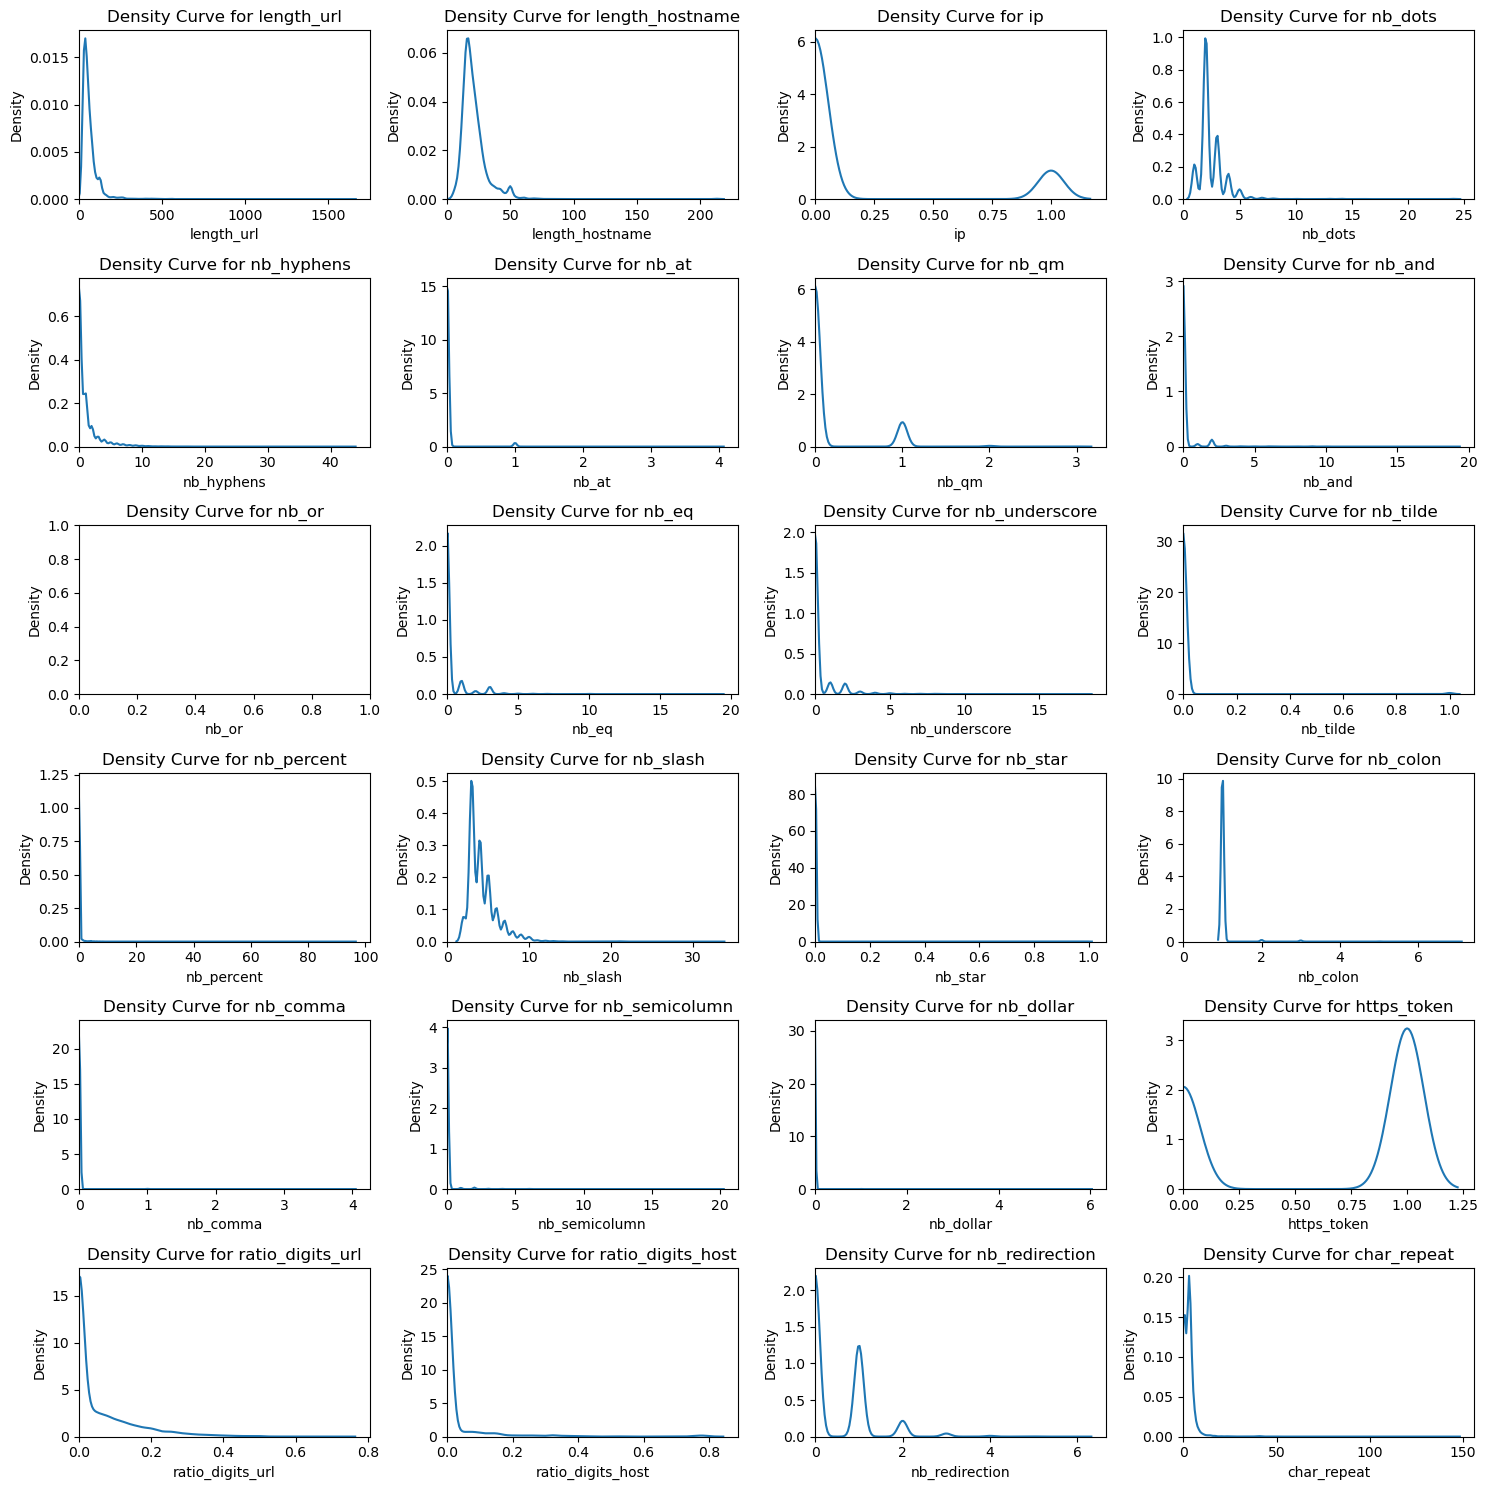

In [56]:
# Create a figure with subplots (6 rows x 4 columns for 24 histograms)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature (column) and plot its histogram
for i, column in enumerate(phishing_webpage_features.columns):
    sns.kdeplot(phishing_webpage_features[column], ax=axes[i], warn_singular=False)
    axes[i].set_title(f'Density Curve for {column}')
    axes[i].set_ylabel('Density')
    axes[i].set_xlim(left=0)
    axes[i].set_ylim(bottom=0)

# Display plots
plt.tight_layout()
plt.show()


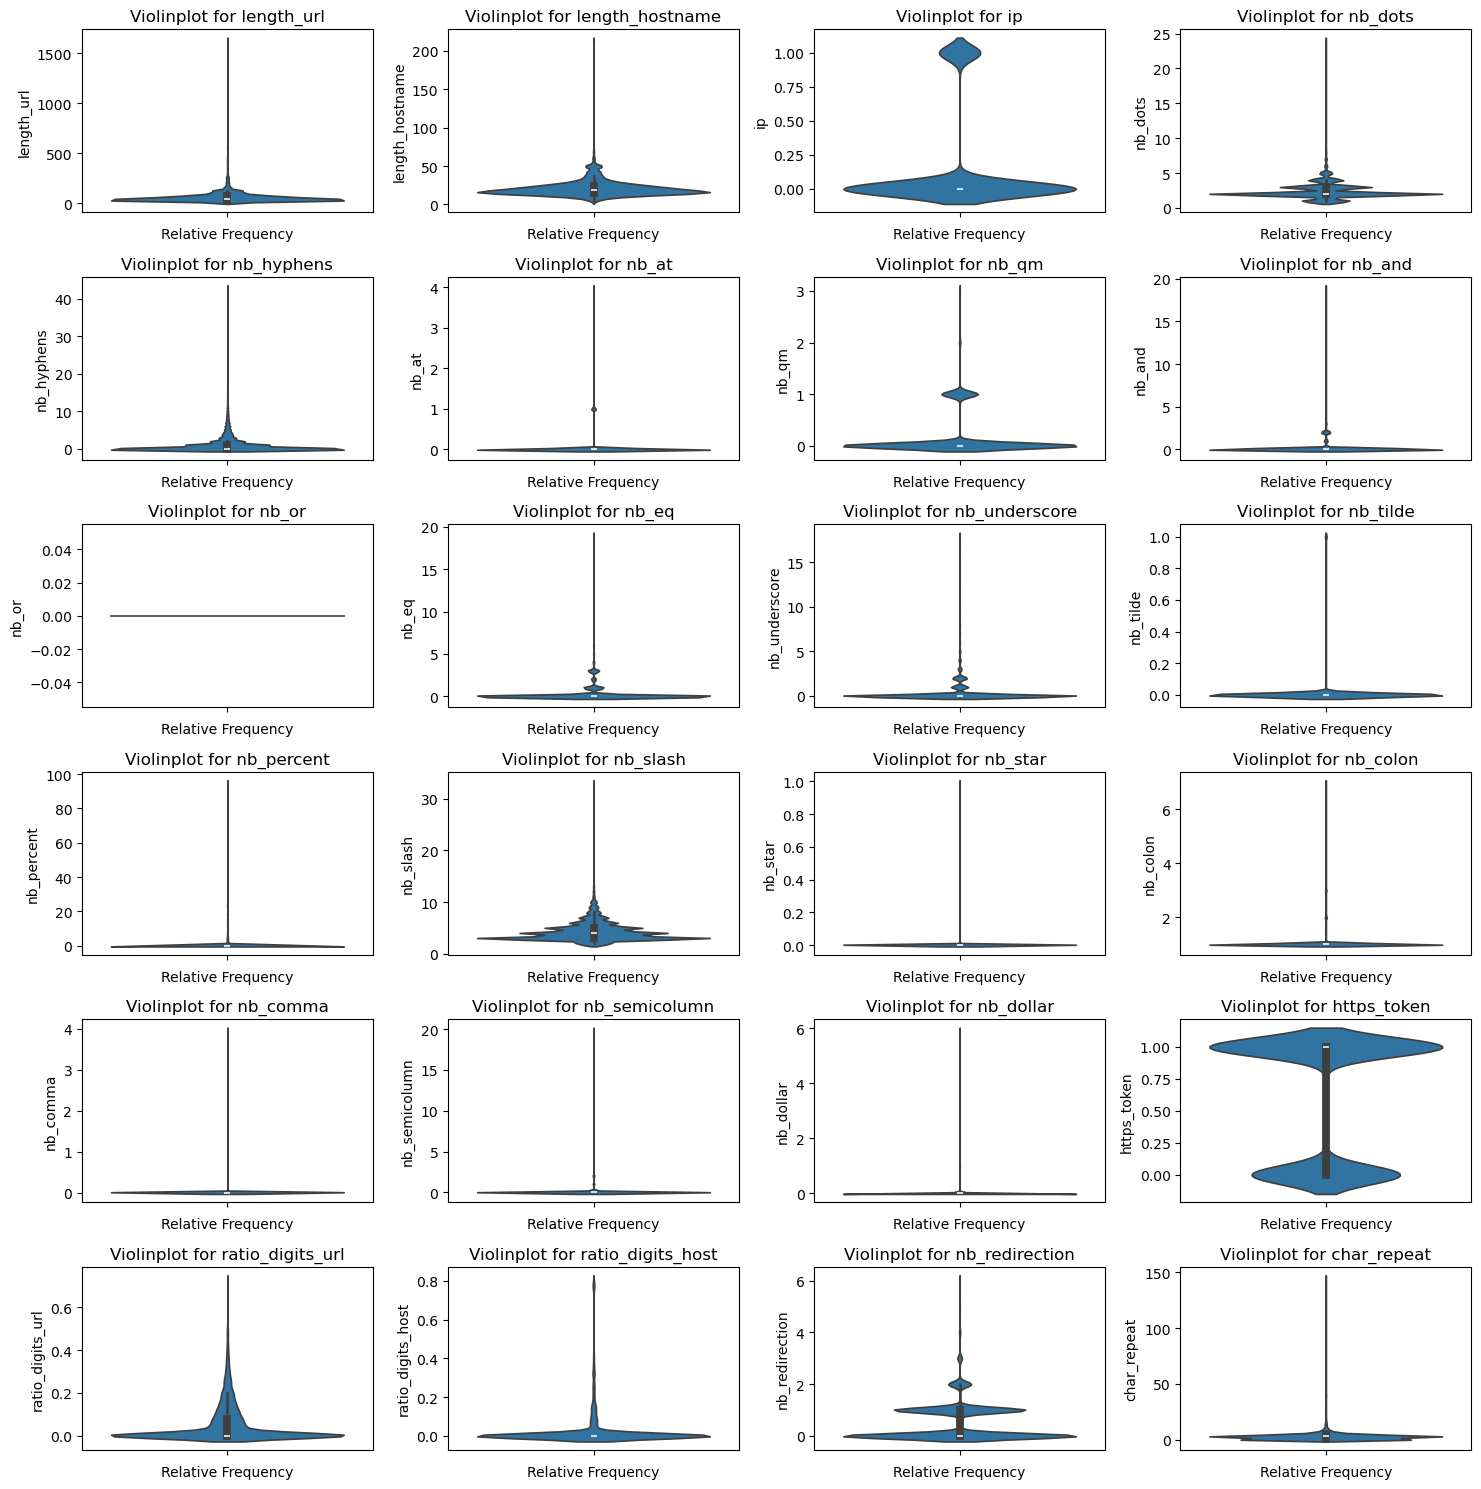

In [57]:
# Create a figure with subplots (6 rows x 4 columns for 24 histograms)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature (column) and plot its histogram
for i, column in enumerate(phishing_webpage_features.columns):
    sns.violinplot(phishing_webpage_features[column], ax=axes[i])
    axes[i].set_title(f'Violinplot for {column}')
    axes[i].set_xlabel('Relative Frequency')

# Display plots
plt.tight_layout()
plt.show()

In [58]:
# Let explore the length of url and length of hostname after removing some 
# outliers since the outliers are "squishing" the distribution to the left bin.

# What is the max?
phishing_webpage_features['length_url'].max()

1641

In [59]:
# Remove some outliers to explore the more common URL lengths
df_filtered = phishing_webpage_features[["length_url"]].query('length_url < 200')

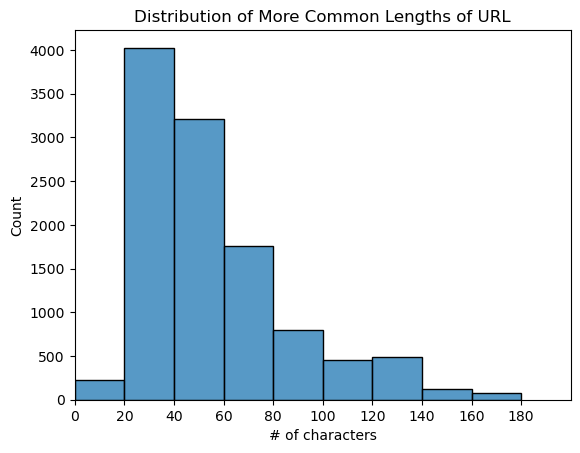

In [60]:
# Plot more common url lengths
bins = list(range(0, 200, 20))
sns.histplot(df_filtered['length_url'], bins=bins)
plt.title('Distribution of More Common Lengths of URL')
plt.xlabel('# of characters')
plt.xlim(0, 200)
plt.xticks(bins)
None

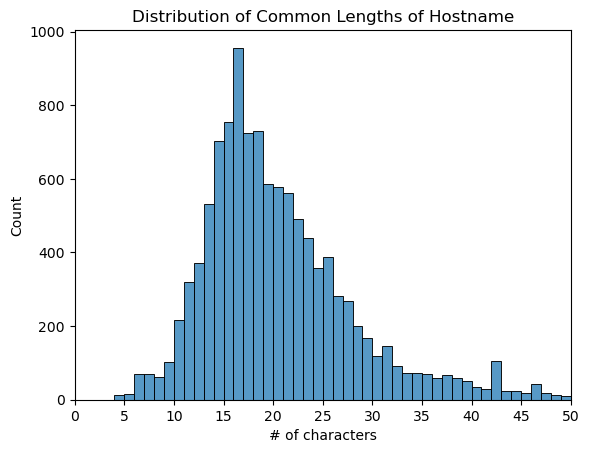

In [61]:
# Remove some outliers to explore the more common hostname lengths
hostname_length_filtered = phishing_webpage_features[["length_hostname"]].query('length_hostname < 50')

# Create histogram
bins = list(range(51))
sns.histplot(hostname_length_filtered['length_hostname'], bins=bins)
plt.title('Distribution of Common Lengths of Hostname')
plt.xlabel('# of characters')
plt.xticks(list(range(0, 51, 5)))
plt.xlim(0, 50)
None

In [62]:
# Filter data to look at less common lengths
url_length_filtered_uncommon = phishing_webpage_features[["length_url"]].query('length_url > 200')
hostname_length_filtered_uncommon = phishing_webpage_features[["length_hostname"]].query('length_hostname > 50')

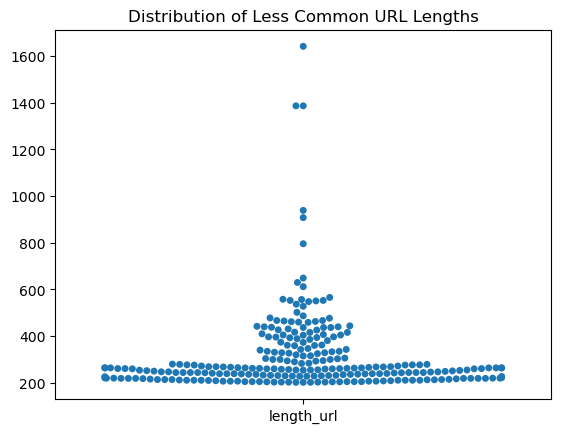

In [63]:
sns.swarmplot(url_length_filtered_uncommon)
plt.title('Distribution of Less Common URL Lengths')
None

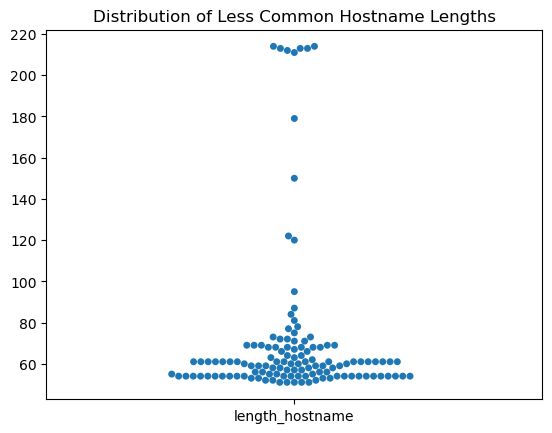

In [64]:
sns.swarmplot(hostname_length_filtered_uncommon)
plt.title('Distribution of Less Common Hostname Lengths')
None

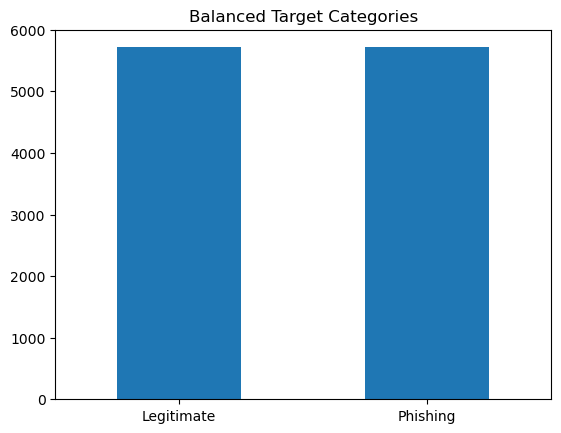

In [65]:
# Look at distribution of target
phishing_webpage_target['legitimate'].value_counts().plot.bar()
plt.title('Balanced Target Categories')
plt.xlabel(None)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Phishing'], rotation=0)
None

### Dataset 2: Phishing Email Detection

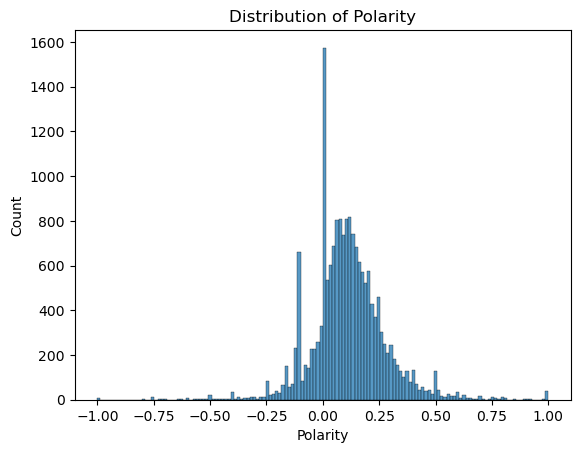

In [66]:
sns.histplot(phishing_email_cleaned['Polarity'])
plt.title("Distribution of Polarity")
None

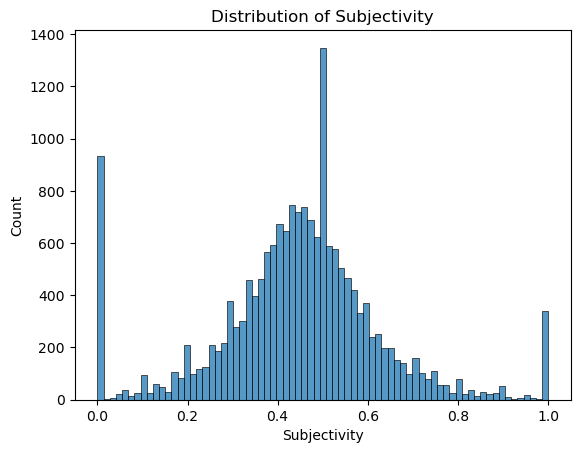

In [67]:
sns.histplot(phishing_email_cleaned['Subjectivity'])
plt.title("Distribution of Subjectivity")
None

In [68]:
phishing_email_cleaned['Unique_Words'].max()

64134

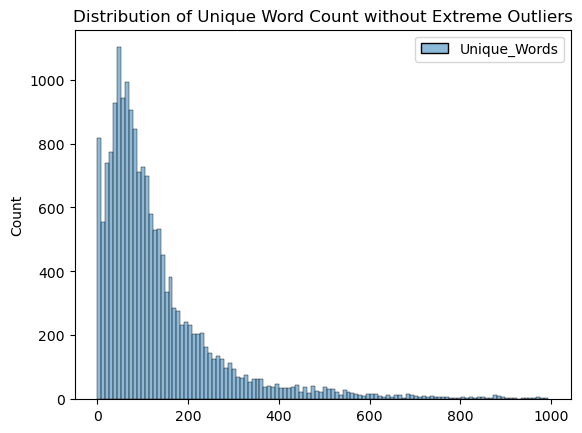

In [69]:
sns.histplot(phishing_email_cleaned[['Unique_Words']].query('Unique_Words < 1000'))
plt.title("Distribution of Unique Word Count without Extreme Outliers")
None

### Dataset 3: Credit Card Transactions Fraud Detection Dataset

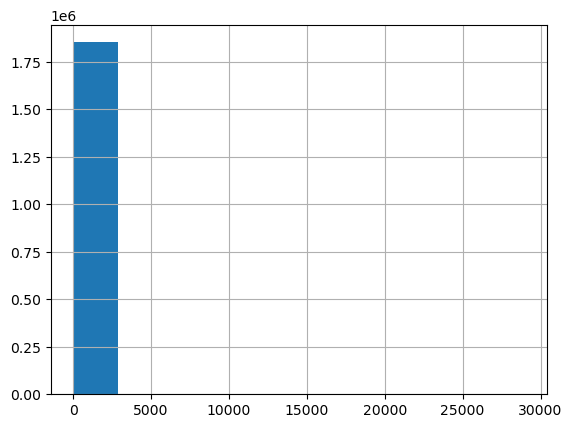

In [70]:
_ = credit_card_raw['amt'].hist()

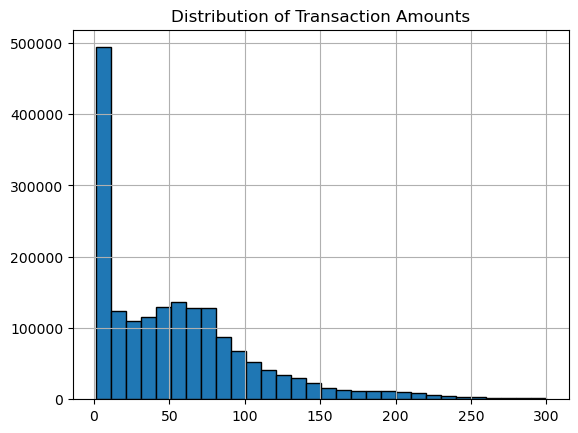

In [71]:
credit_card_raw.query("amt < 300")['amt'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Transaction Amounts')
None

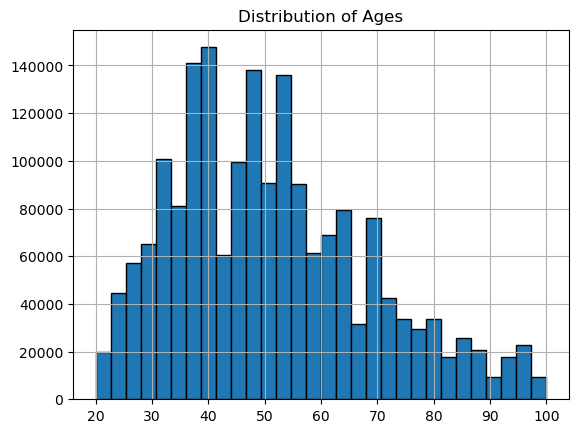

In [72]:
credit_card_raw['age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Ages')
None

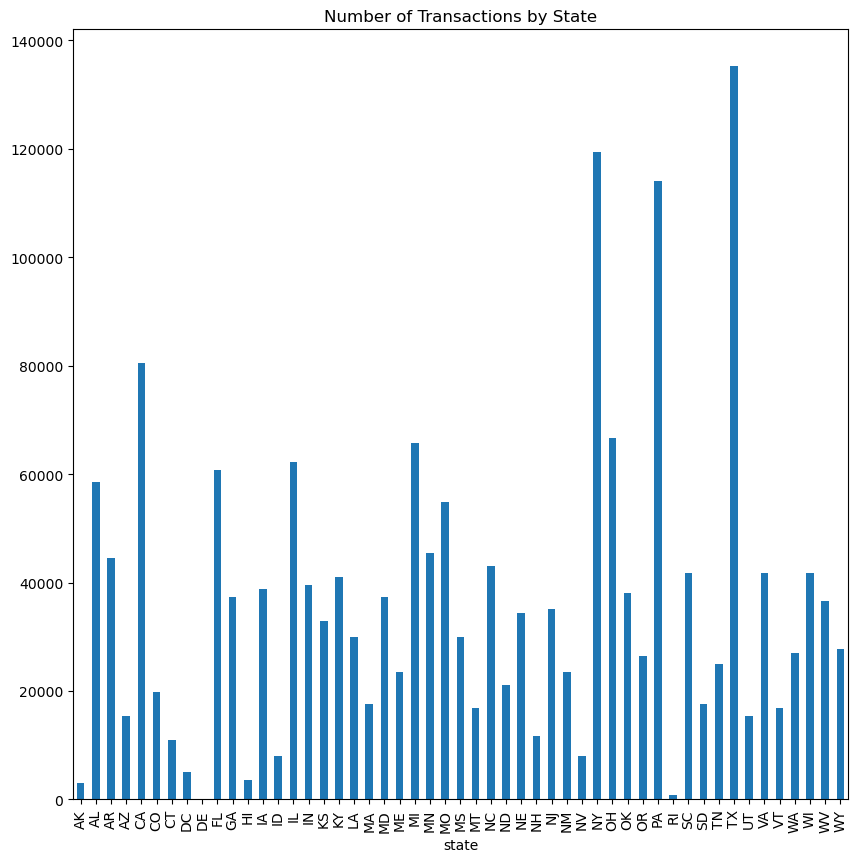

In [73]:
bystate = credit_card_raw.groupby('state')['trans_date_trans_time'].count()
bystate.plot.bar(figsize=(10, 10), legend=False)
plt.title('Number of Transactions by State')
None

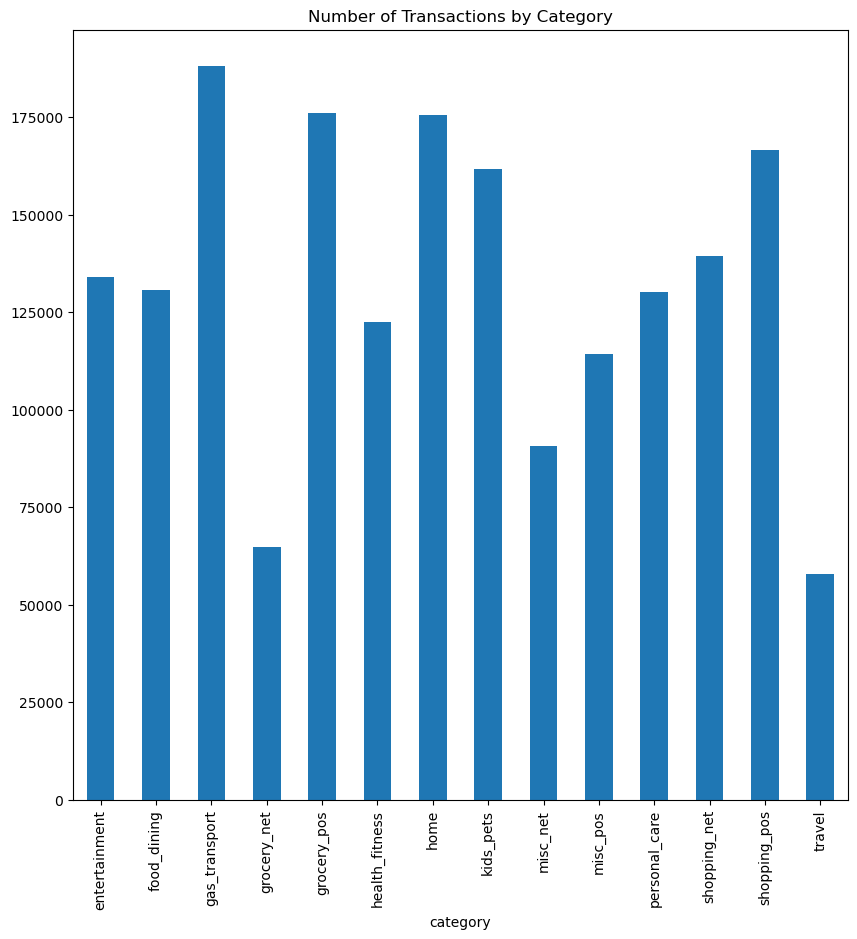

In [74]:
bycategory = credit_card_raw.groupby('category').count()[['trans_date_trans_time']]
bycategory.plot.bar(figsize=(10, 10), legend=False)
plt.title('Number of Transactions by Category')
None

## Bivariant Analysis

### Dataset 1: Web Page Phishing Detection

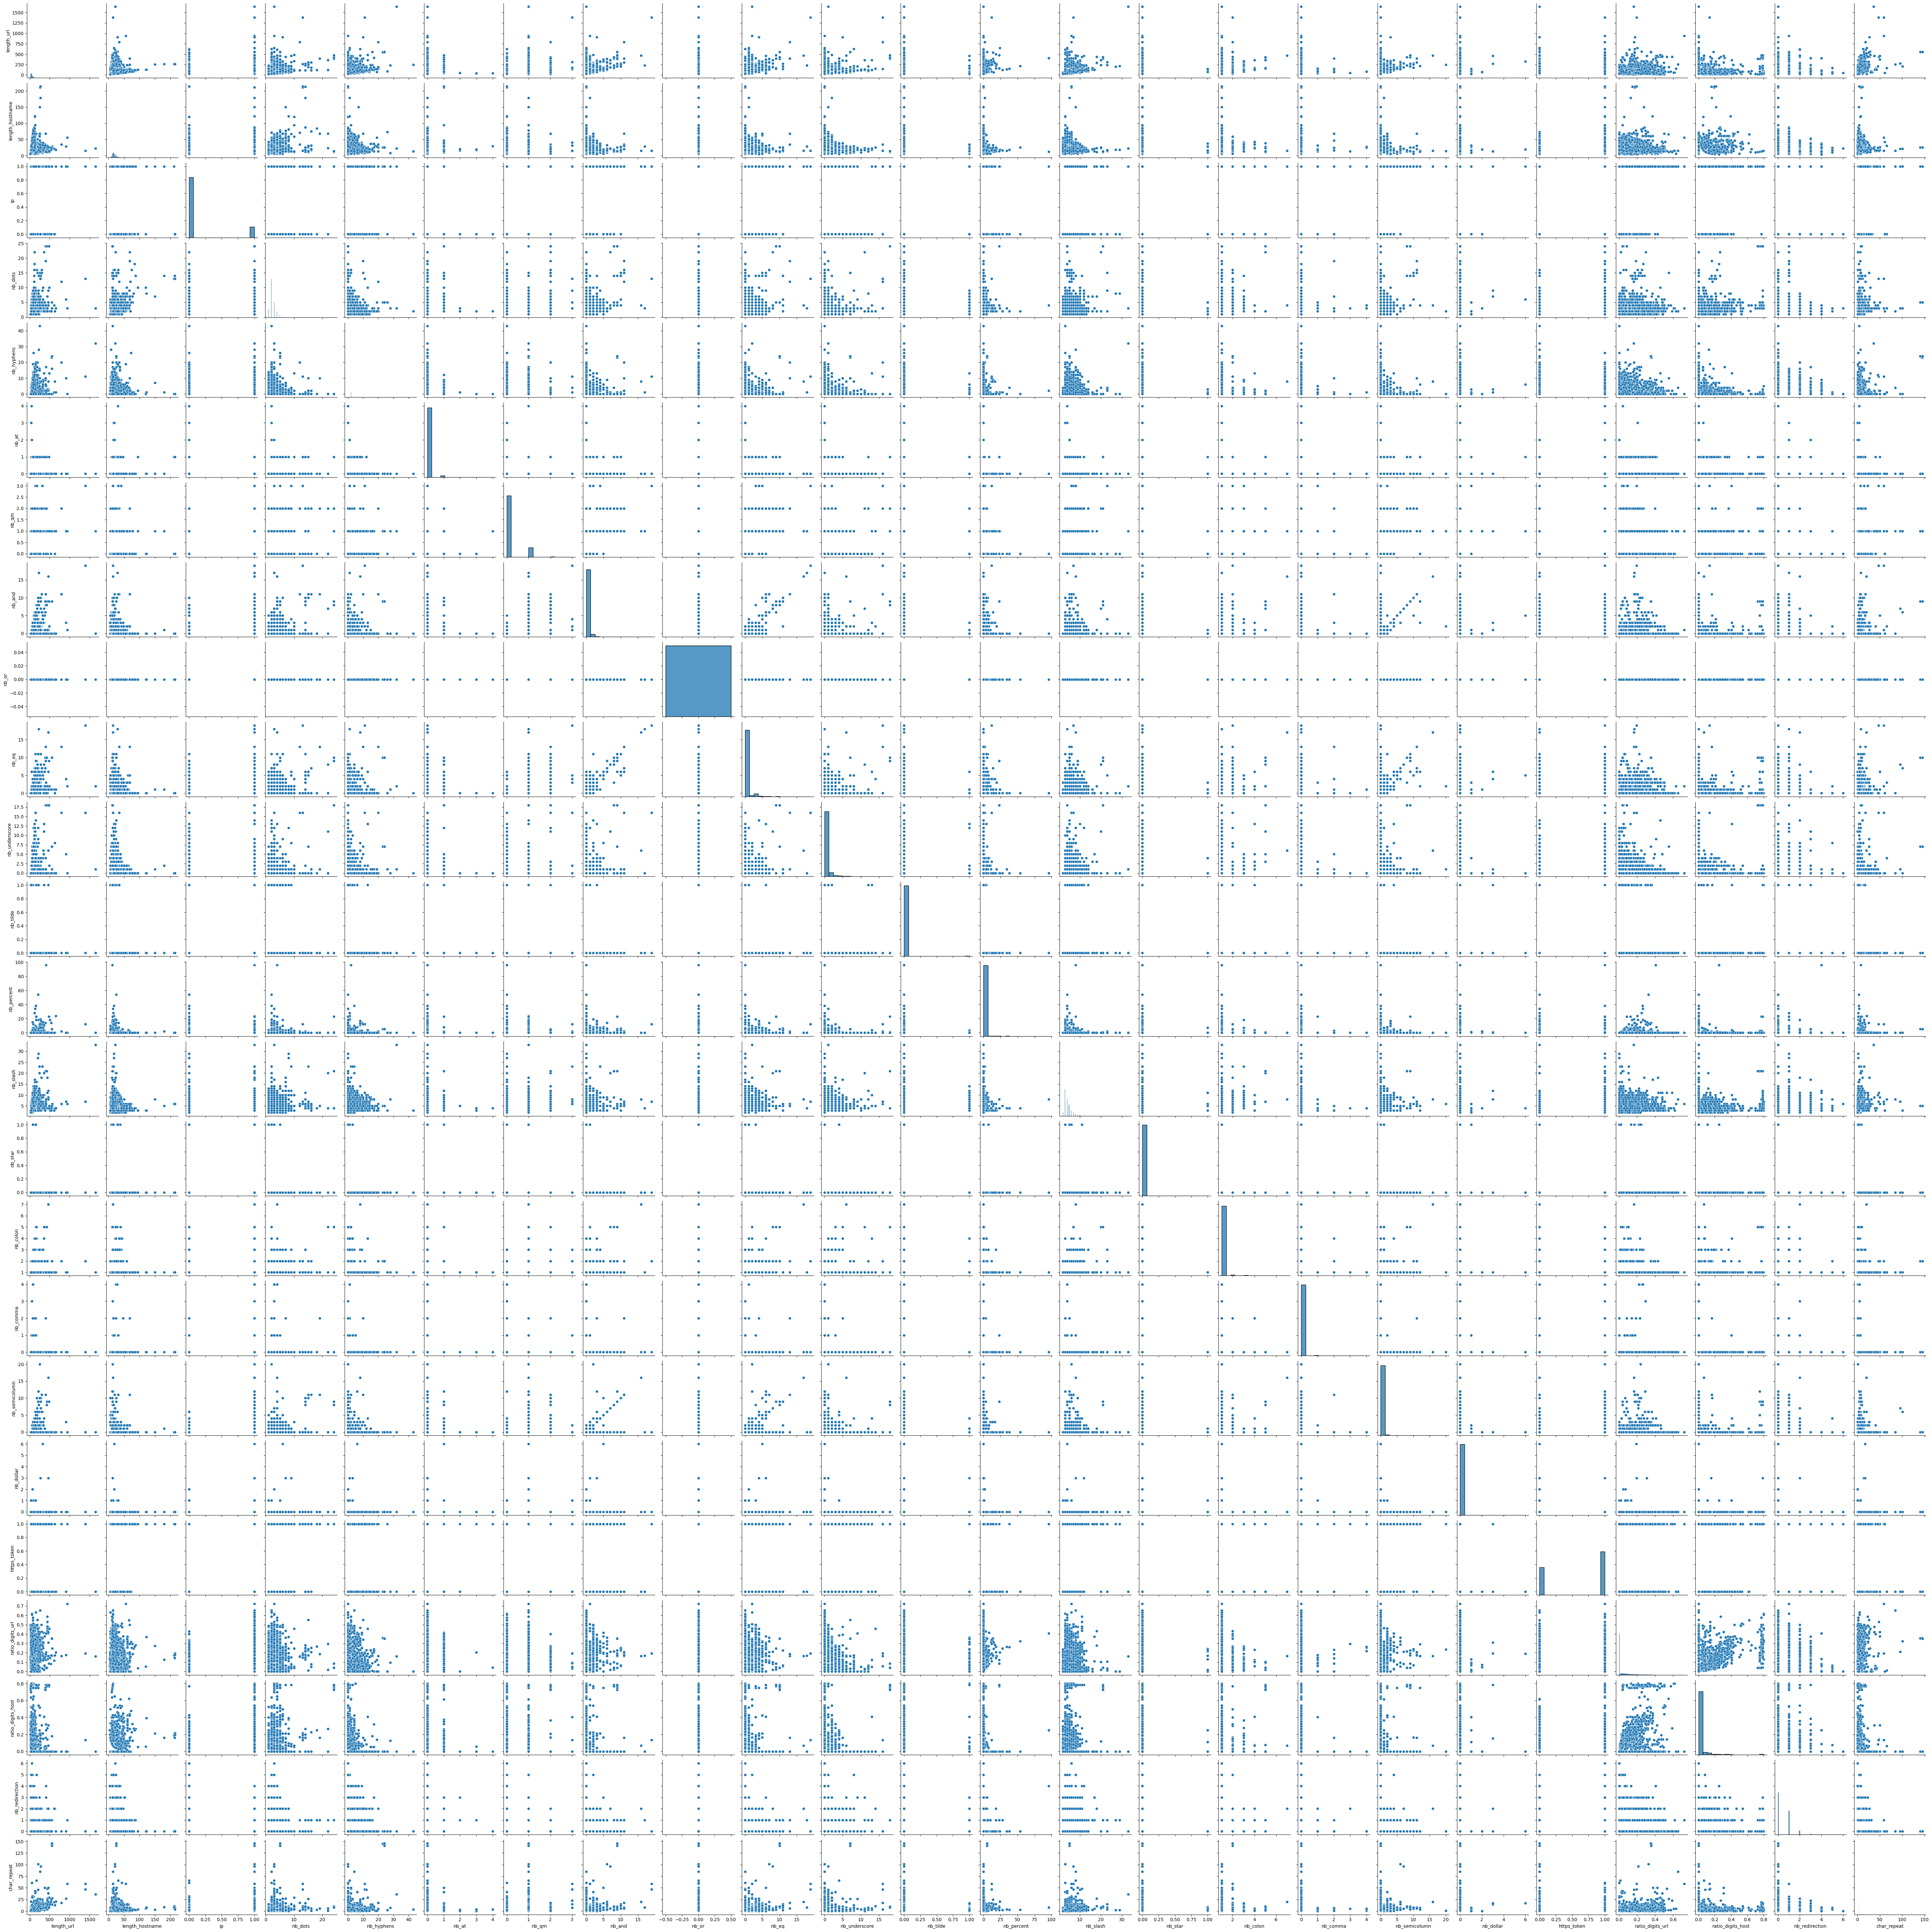

In [75]:
sns.pairplot(phishing_webpage_features)
None

In [76]:
interesting_features = phishing_webpage_features[['length_url', 'length_hostname', 'nb_hyphens', 'ratio_digits_url', 'ratio_digits_host', 'char_repeat']]

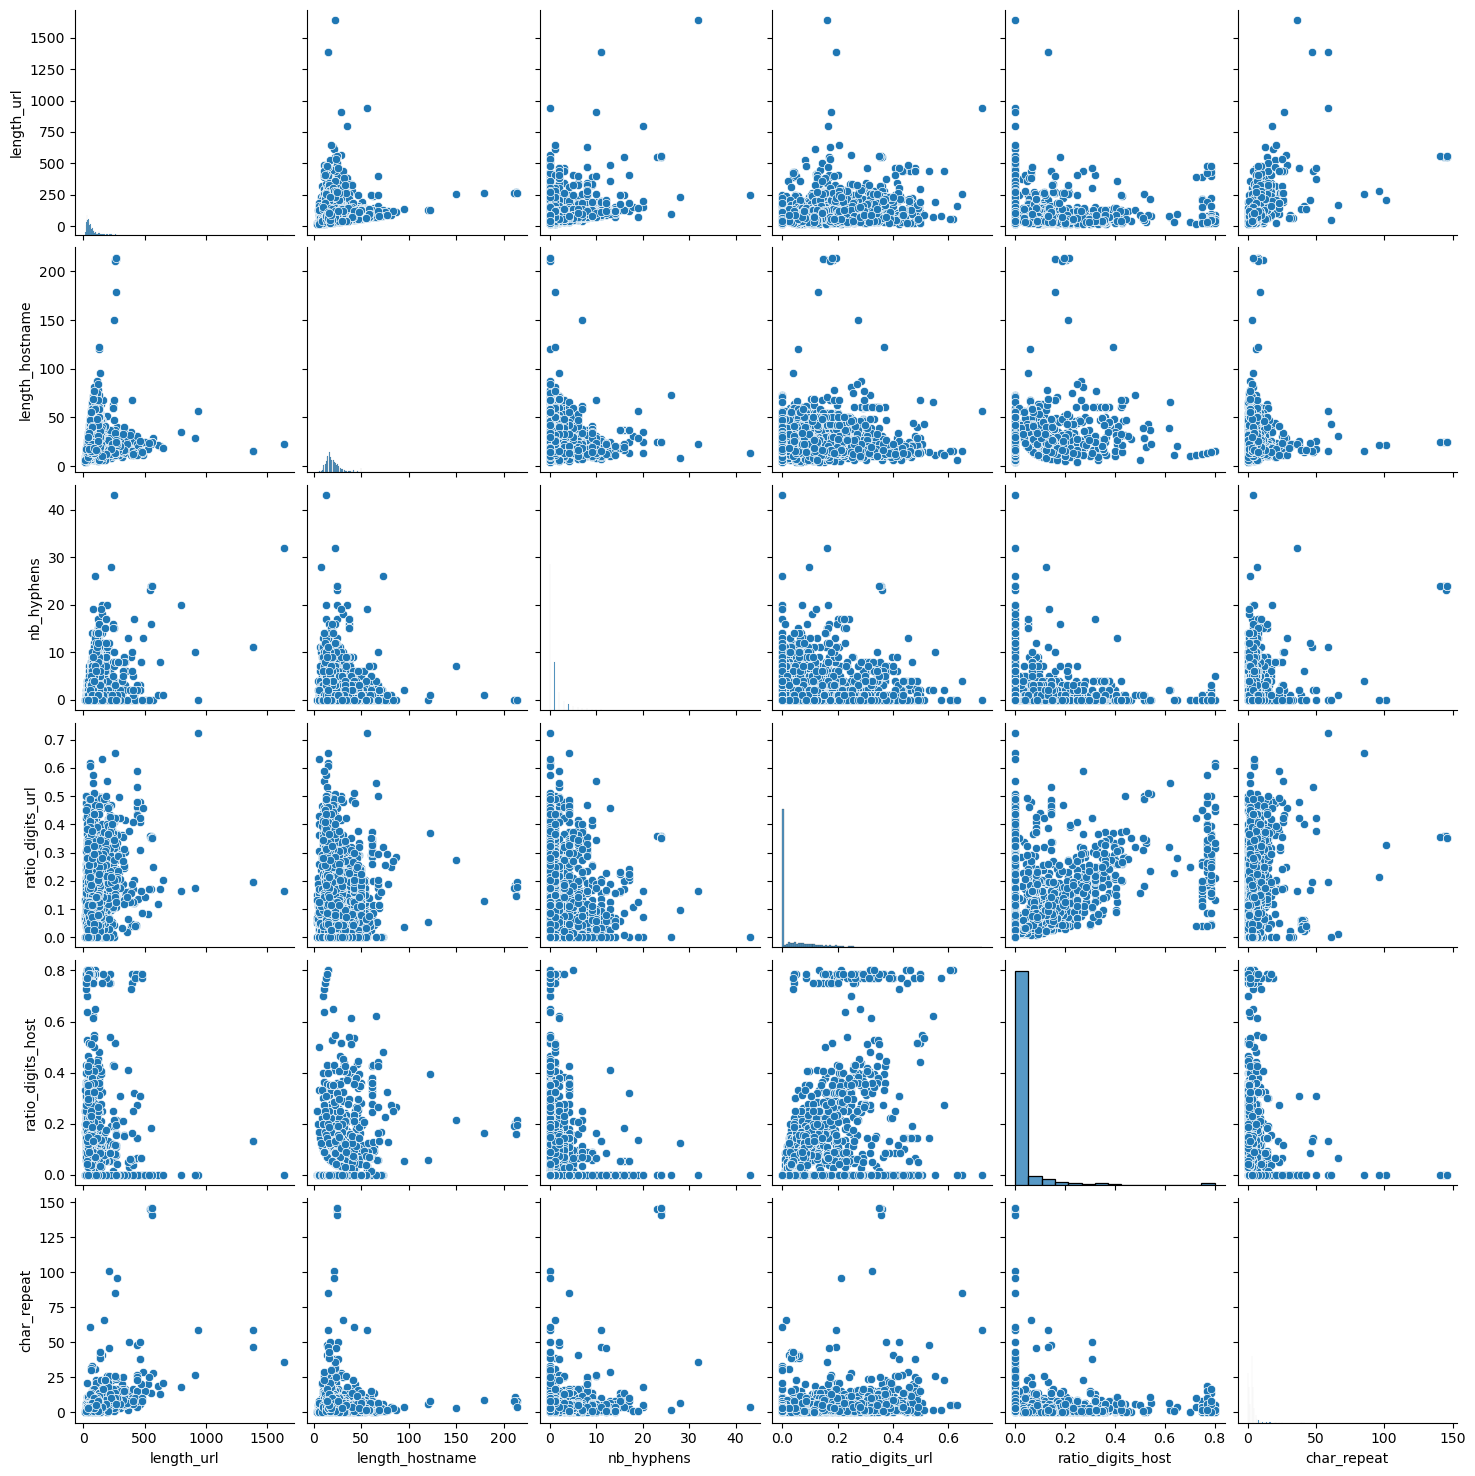

In [77]:
sns.pairplot(interesting_features)

### Dataset 2: Phishing Email Detection

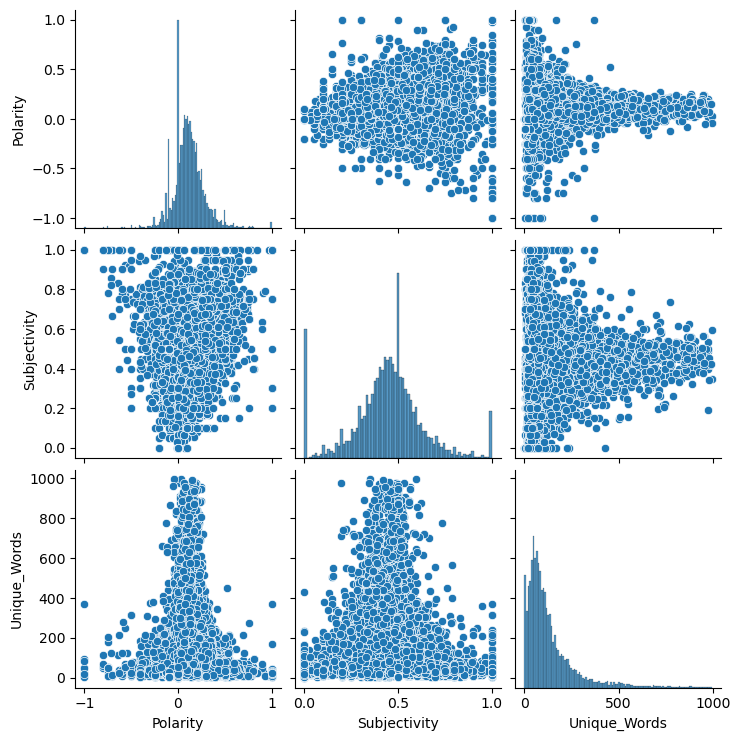

In [78]:
sns.pairplot(phishing_email_cleaned[['Polarity', 'Subjectivity', 'Unique_Words']].query('Unique_Words < 1000'))
None

### Dataset 3: Credit Card Transactions Fraud Detection Dataset

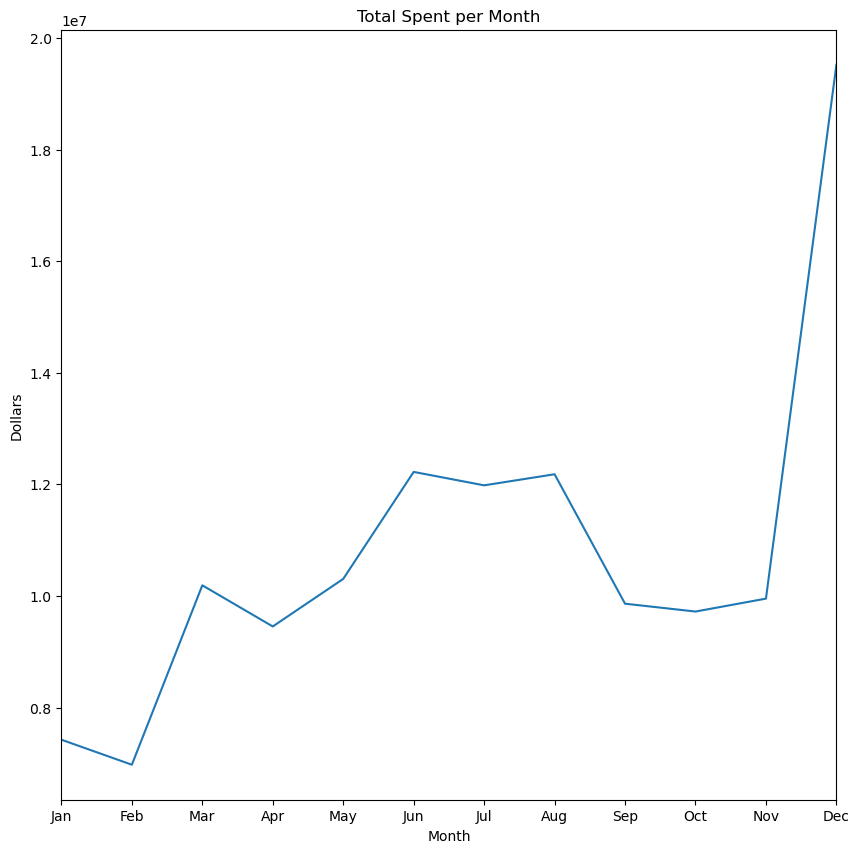

In [79]:
bymonth = credit_card_raw.groupby(credit_card_raw['trans_date_trans_time'].dt.month)['amt'].sum()
bymonth.plot.line(figsize=(10, 10), legend=False)
plt.title('Total Spent per Month')
plt.xlim(1, 12)
plt.xlabel('Month')
plt.ylabel('Dollars')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
None